In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons, make_circles, make_blobs
import matplotlib.pyplot as plt

## Generating synthetic datasets

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [3]:
# ----------- Two Moons Dataset -----------
X_moons, y_moons = make_moons(n_samples=500, noise=0.08, random_state=42)
df_moons = pd.DataFrame(X_moons, columns=["x1", "x2"])

scaler
df_moons["label"] = y_moons

In [4]:
# ----------- Concentric Circles Dataset -----------
X_circles, y_circles = make_circles(n_samples=500, noise=0.05, factor=0.4, random_state=42)
df_circles = pd.DataFrame(X_circles, columns=["x1", "x2"])
df_circles["label"] = y_circles


In [5]:
# ----------- Gaussian Blobs (linear clusters) -----------
X_blobs, y_blobs = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)
df_blobs = pd.DataFrame(X_blobs, columns=["x1", "x2"])
df_blobs["label"] = y_blobs


In [6]:
# ----------- Warped Blobs (nonlinear transformation) -----------
X_warped = X_blobs.copy()
X_warped[:, 1] = X_warped[:, 1] + np.sin(X_warped[:, 0])
df_warped = pd.DataFrame(X_warped, columns=["x1", "x2"])
df_warped["label"] = y_blobs

In [7]:
def generate_spiral(n_points, noise=0.2):
    theta = np.sqrt(np.random.rand(n_points)) * 4 * np.pi
    r = 2 * theta + np.random.randn(n_points) * noise
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.vstack((x, y)).T

X_spiral = np.concatenate([generate_spiral(250), generate_spiral(250)])
y_spiral = np.array([0]*250 + [1]*250)
df_spiral = pd.DataFrame(X_spiral, columns=["x1", "x2"])
df_spiral["label"] = y_spiral


In [8]:
# ----------- Donut / Annulus Dataset -----------
radius_inner, radius_outer = 1.0, 3.0
angles_inner = 2 * np.pi * np.random.rand(250)
angles_outer = 2 * np.pi * np.random.rand(250)
inner_circle = np.c_[radius_inner * np.cos(angles_inner),
                     radius_inner * np.sin(angles_inner)]
outer_circle = np.c_[radius_outer * np.cos(angles_outer),
                     radius_outer * np.sin(angles_outer)]
X_donut = np.vstack([inner_circle, outer_circle]) + np.random.normal(0, 0.1, (500, 2))
y_donut = np.array([0]*250 + [1]*250)
df_donut = pd.DataFrame(X_donut, columns=["x1", "x2"])
df_donut["label"] = y_donut


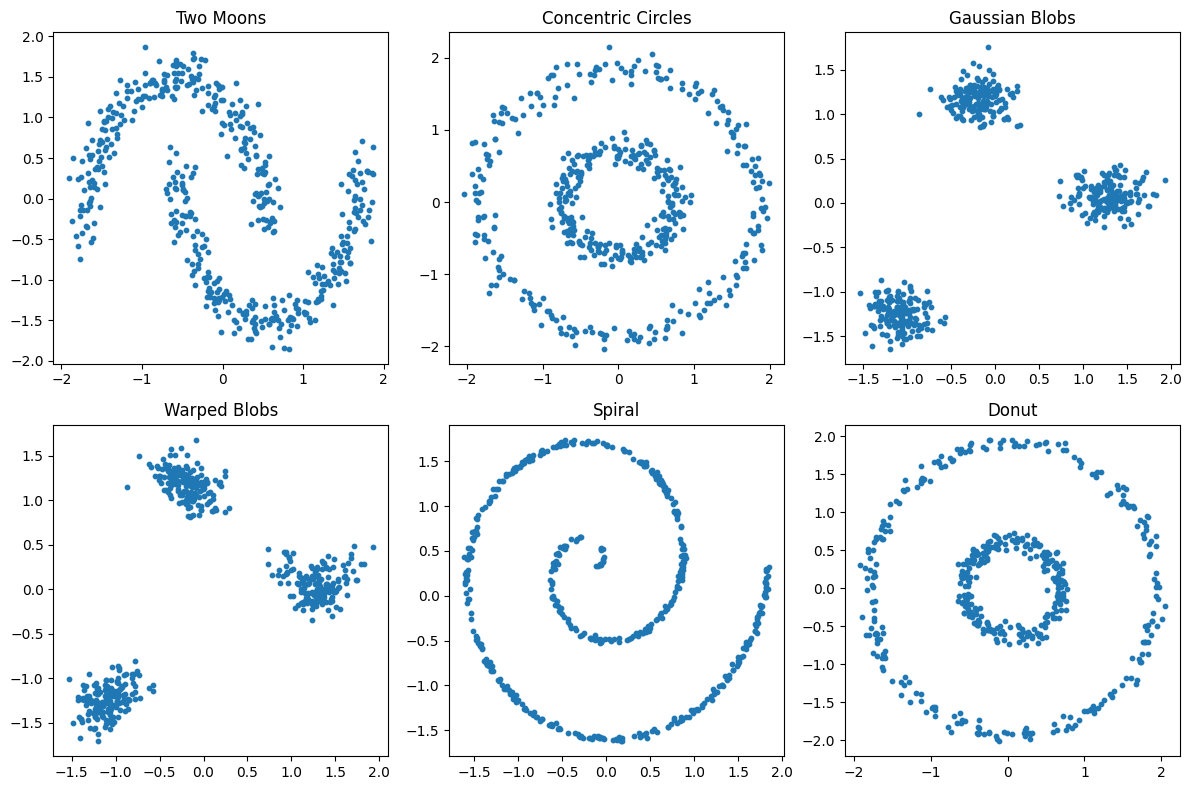

In [9]:


datasets = [
    ("Two Moons", df_moons), ("Concentric Circles", df_circles),
    ("Gaussian Blobs", df_blobs), ("Warped Blobs", df_warped),
    ("Spiral", df_spiral), ("Donut", df_donut)
]

for title, dataset in datasets:

    dataset[["x1", "x2"]] = scaler.fit_transform(dataset[["x1", "x2"]])


fig, axes = plt.subplots(2,3 ,figsize = (12,8))

for index, ax in enumerate(axes.ravel()):
    title,dataset = datasets[index]
    ax.scatter(dataset['x1'],dataset['x2'],s=10)
    ax.set_title(title)
plt.tight_layout()
plt.show()

## Algorithms

In [10]:
## Plotting common code

def plotting(ax,dataset_title,dataset,clusters):
    unique_clusters = np.unique(clusters)
    colors_dark = ['red','blue','green']

    for color_index, cluster in enumerate(unique_clusters):

        mask = clusters == cluster
        cluster_points = dataset[mask]
        
        
        ax.scatter(cluster_points['x1'], cluster_points['x2'], 
                    color=colors_dark[color_index], label=f'Cluster {cluster}'
                    )
    ax.set_title(dataset_title)

### Centroid Based 

#### K - Means

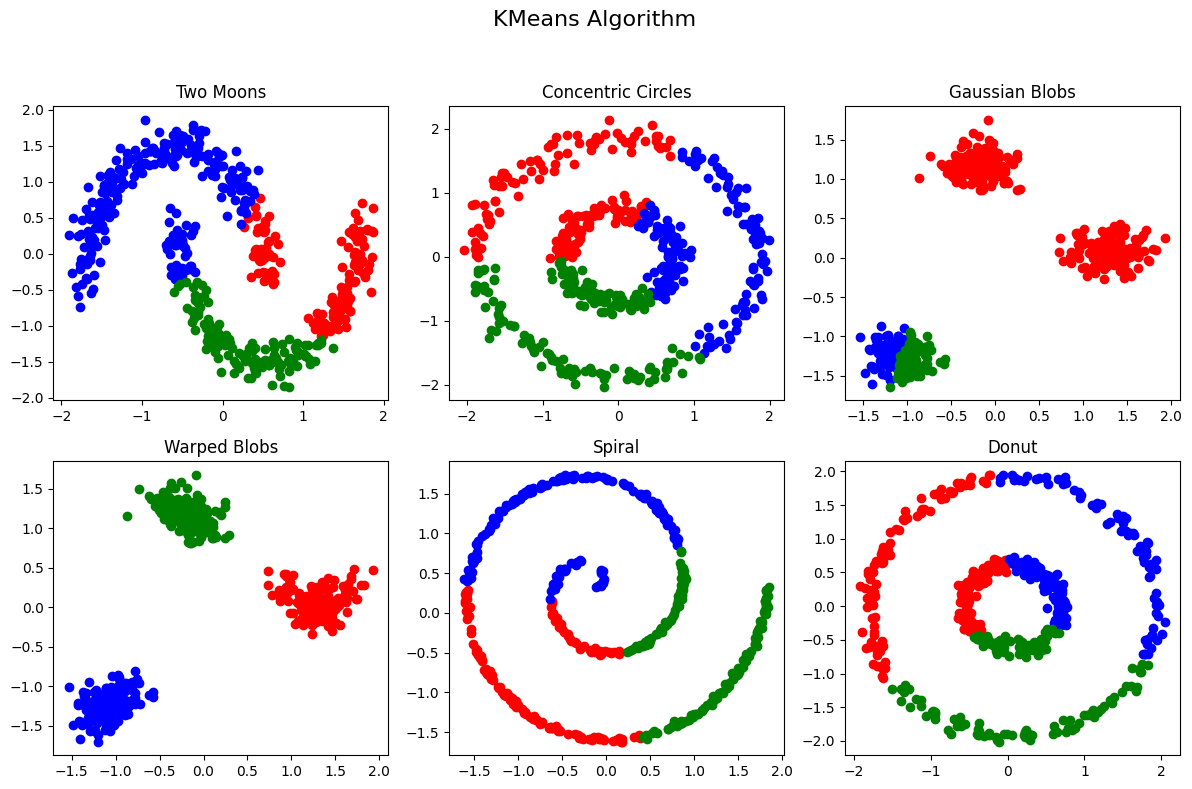

In [11]:
import importlib
import kmeans

# reload the whole module
importlib.reload(kmeans)
from kmeans import ManualKMeans


fig, axes = plt.subplots(2,3 ,figsize = (12,8))

for index, ax in enumerate(axes.ravel()):
    title,dataset = datasets[index]

    manual_kmeans_algo = ManualKMeans(data = dataset[['x1','x2']],n_clusters = 3)

    manual_kmeans_inertia,manual_kmeans_centers,manual_kmeans_clusters = manual_kmeans_algo.get_clusters()

    plotting(ax,title,dataset,manual_kmeans_clusters)
    
fig.suptitle("KMeans Algorithm", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



#### K - Means ++

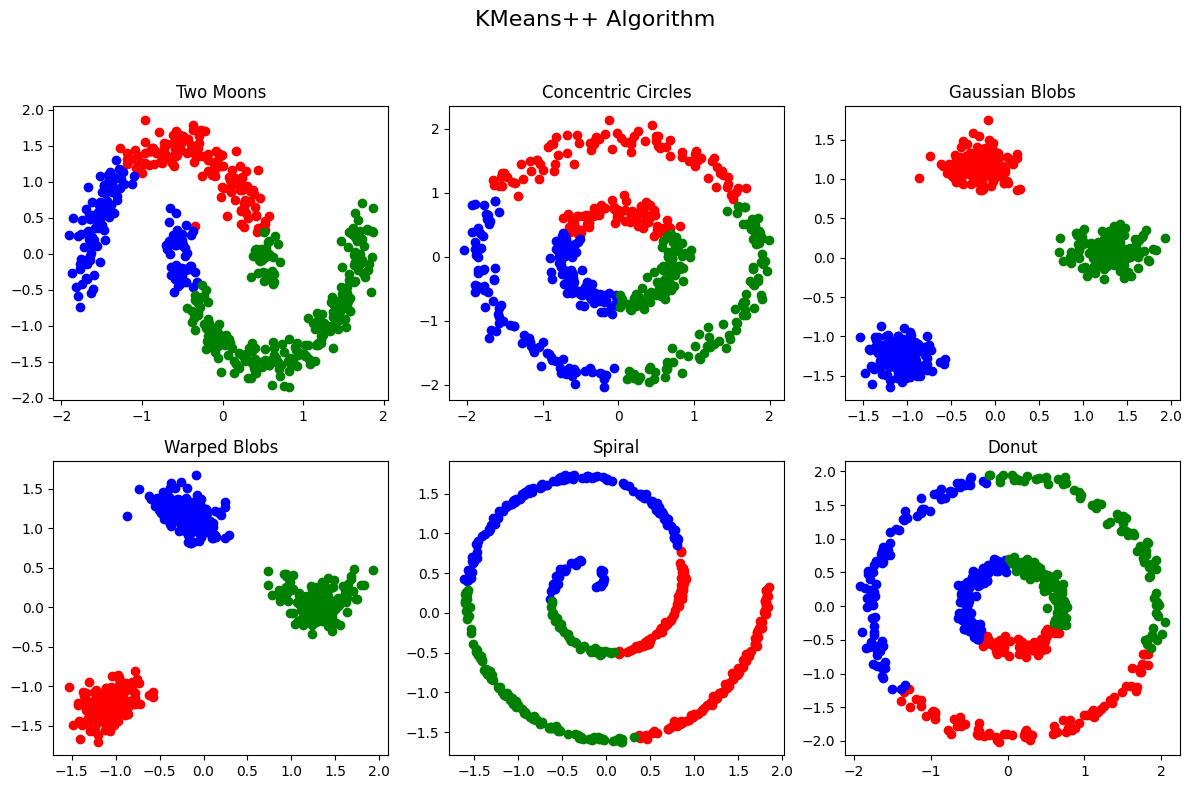

In [12]:
import kmeanspp

# reload the whole module
importlib.reload(kmeanspp)
from kmeanspp import ManualKMeansPP


fig, axes = plt.subplots(2,3 ,figsize = (12,8))

for index, ax in enumerate(axes.ravel()):
    title,dataset = datasets[index]

    manual_kmeans_algo = ManualKMeansPP(data = dataset[['x1','x2']],n_clusters=3)

    inertia,centers,clusters = manual_kmeans_algo.get_clusters()

    plotting(ax,title,dataset,clusters)
    
fig.suptitle("KMeans++ Algorithm", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### K - Medoids

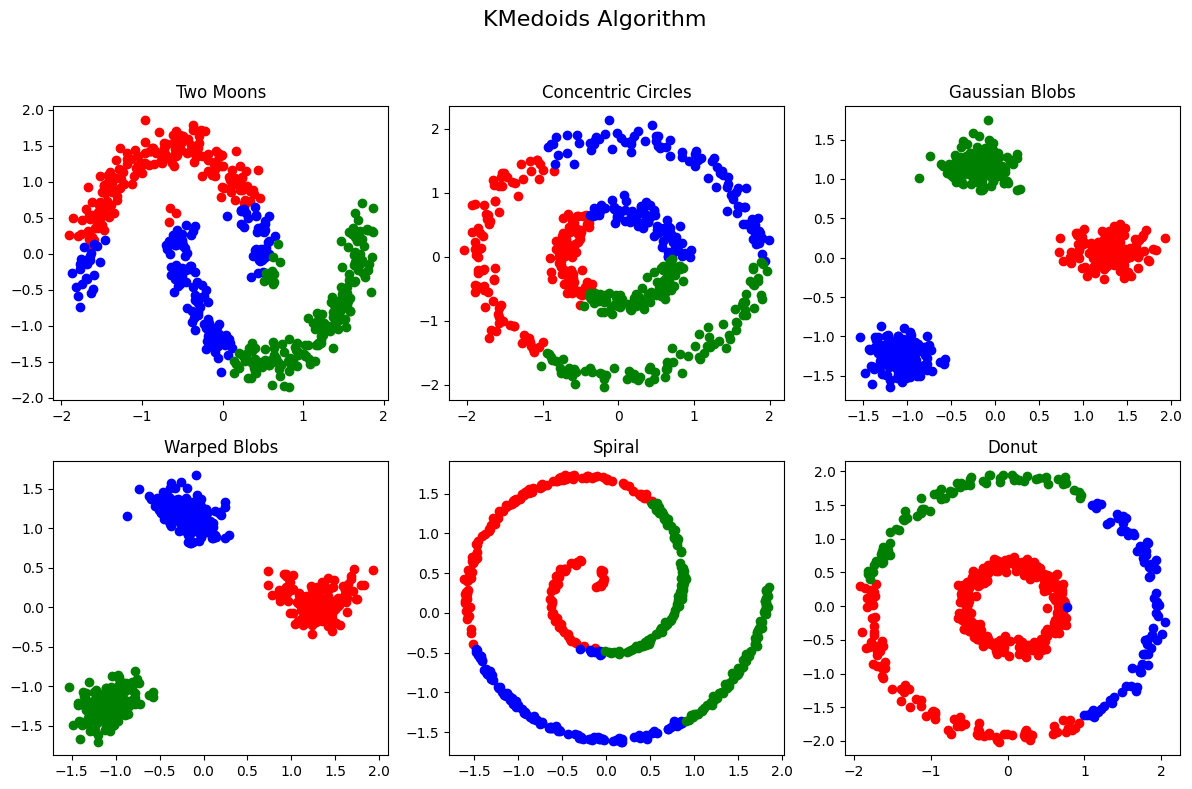

In [13]:
import kmedoids

# reload the whole module
importlib.reload(kmedoids)
from kmedoids import KMedoids


fig, axes = plt.subplots(2,3 ,figsize = (12,8))

for index, ax in enumerate(axes.ravel()):
    title,dataset = datasets[index]

    manual_kmedoids_algo = KMedoids(data = dataset[['x1','x2']],n_clusters = 3)

    manual_kmedoids_inertia,manual_kmedoids_centers,manual_kmedoids_clusters = manual_kmedoids_algo.get_clusters()

    plotting(ax,title,dataset,manual_kmedoids_clusters)
    
fig.suptitle("KMedoids Algorithm", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Mini - Batch Kmeans ++

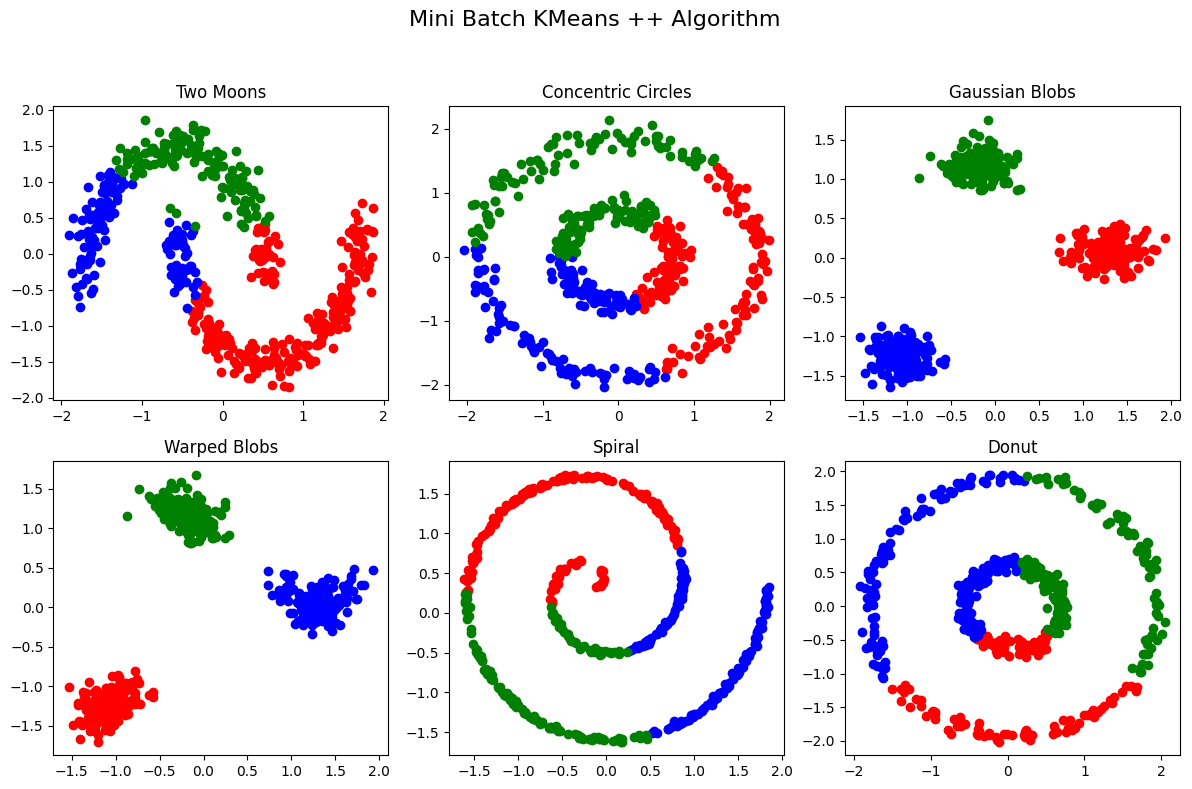

In [14]:
import mini_batch_kmeanspp

# reload the whole module
importlib.reload(mini_batch_kmeanspp)
from mini_batch_kmeanspp import MiniBatchKmeanspp


fig, axes = plt.subplots(2,3 ,figsize = (12,8))

for index, ax in enumerate(axes.ravel()):
    title,dataset = datasets[index]

    manual_mini_batch_kmeans_algo = MiniBatchKmeanspp(data = dataset[['x1','x2']],n_clusters = 3)

    manual_mini_batch_kmeans_inertia,manual_mini_batch_kmeans_centers,manual_mini_batch_kmeans_clusters = manual_mini_batch_kmeans_algo.get_clusters(batch_size = 100)

    plotting(ax,title,dataset,manual_mini_batch_kmeans_clusters)
    
fig.suptitle("Mini Batch KMeans ++ Algorithm", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Density-Based Methods

#### Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

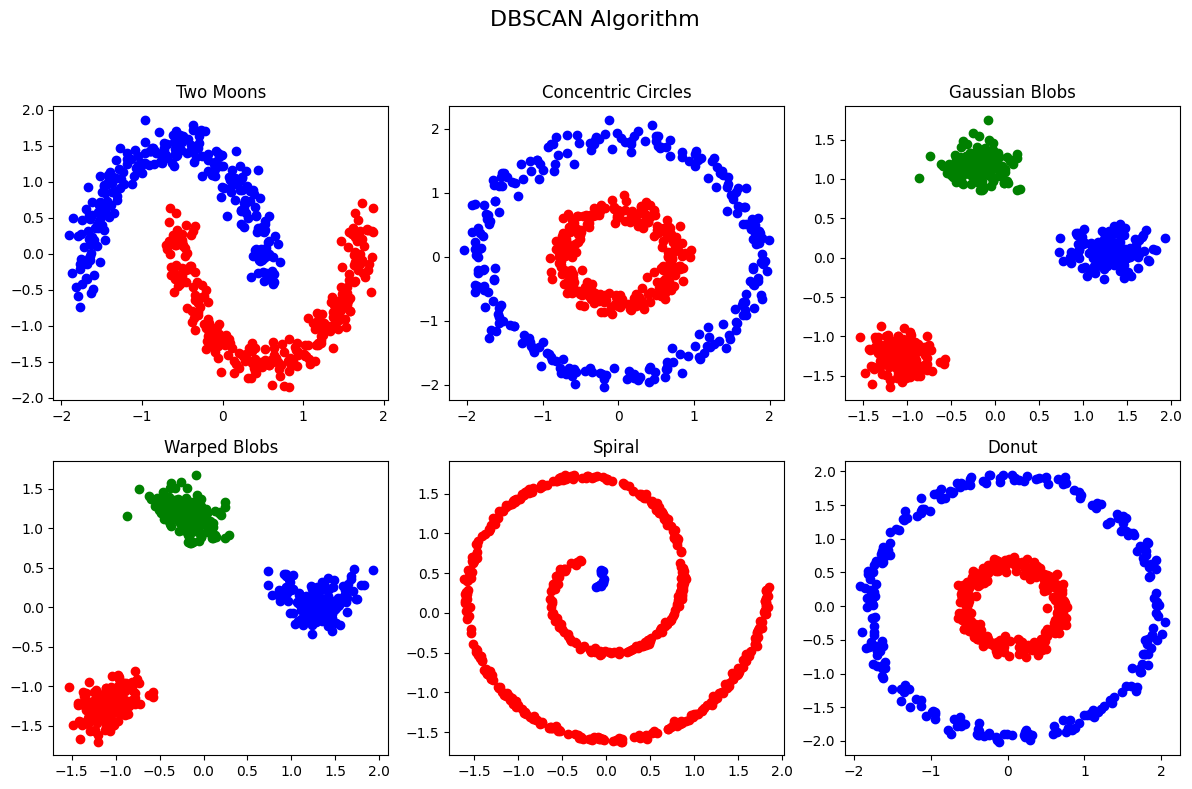

In [48]:
import dbscan

# reload the whole module
importlib.reload(dbscan)
from dbscan import DBSCAN


fig, axes = plt.subplots(2,3 ,figsize = (12,8))

## The epsilon values below were determined empirically (trial and error) for the given dataset shapes
epsilons = [0.3,0.3,0.4,0.4,0.2,0.3]

for index, ax in enumerate(axes.ravel()):
    title,dataset = datasets[index]
    epsilon = epsilons[index]

    dbscan_algo = DBSCAN(data = dataset[['x1','x2']],epsilon = epsilon,MinPts = 3)

    dbscan_clusters = dbscan_algo.get_clusters()
   
    plotting(ax,title,dataset,dbscan_clusters)
    
fig.suptitle("DBSCAN Algorithm", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()